# Análisis Exploratorio de los Datos (EDA)

Librerias a utilizar

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import requests

warnings.filterwarnings('ignore')
sns.set()

In [4]:
def get_url(url):
    api_key = '7rzbGLPyLBX5oegA957IyPUBmjp7ixTlxO04Ql0t'
    url = url.replace('YOUR_API_KEY',api_key)
    return url

In [5]:
response = requests.get(get_url('http://api.datosabiertos.enacom.gob.ar/api/v2/visualizations/PENET-DE-INTER-FIJO-57760/?auth_key=YOUR_API_KEY'))
response.json()

{'result': None,
 'status': 3,
 'endpoint': None,
 'description': 'Número de accesos al servicio de Internet fijo por cada 100 hogares por provincia',
 'parameters': [],
 'tags': ['internet', 'banda ancha', 'penetración'],
 'last_revision_id': 50976,
 'timestamp': None,
 'created_at': '2020-12-22T19:34:37Z',
 'title': 'Penetración de Internet fijo (accesos por cada 100 hogares)',
 'modified_at': '2023-03-21T17:15:43Z',
 'category_id': 79257,
 'methods': None,
 'sources': [],
 'total_revisions': 5,
 'frequency': None,
 'link': None,
 'user': 'nlastra',
 'status_str': None,
 'guid': 'PENET-DE-INTER-FIJO-57760',
 'category_name': 'Acceso a Internet'}

### *Accesos_provincias.csv*

In [6]:
df = pd.read_csv('clean_datasets/accesos_provincias_trimestral.csv')
df.sample(5)

,id,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Dial up,Otros,Total
526,20172Tierra Del Fuego,2017.0,2.0,Tierra Del Fuego,22636.0,6905.0,665.0,10.0,619.0,-384.0,32557.0
745,20144Capital Federal,2014.0,4.0,Capital Federal,455785.0,840224.0,17155.0,1962.0,11994.0,3400.0,1330520.0
760,20144Salta,2014.0,4.0,Salta,76026.0,17289.0,48.0,60.0,26.0,5754.0,93947.0
322,2019 *2 *La Pampa,2019.0,2.0,La Pampa,19471.0,52101.0,4840.0,10789.0,NaN,NaN,90205.0
440,20181Formosa,2018.0,1.0,Formosa,23556.0,7095.0,17.0,1603.0,NaN,NaN,32328.0


In [7]:
data = df.groupby(by=['Provincia']).sum().sort_values(by='Total', ascending=False).reset_index()
data.head()

,Provincia,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Dial up,Otros,Total
0,Buenos Aires,70626.0,86.0,40561026.0,64072849.0,15260042.0,2045824.0,309864.0,871238.0,123354547.0
1,Capital Federal,70626.0,86.0,11742699.0,35195760.0,1378718.0,115443.0,194616.0,395022.0,49071605.0
2,Córdoba,70626.0,86.0,10711013.0,12237764.0,2168773.0,799631.0,4279.0,257401.0,26266087.0
3,Santa Fe,70626.0,86.0,10749241.0,10778378.0,1315470.0,619900.0,11548.0,340340.0,23956260.0
4,Entre Ríos,70626.0,86.0,3425188.0,2833674.0,301631.0,435086.0,2436.0,180617.0,7251950.0


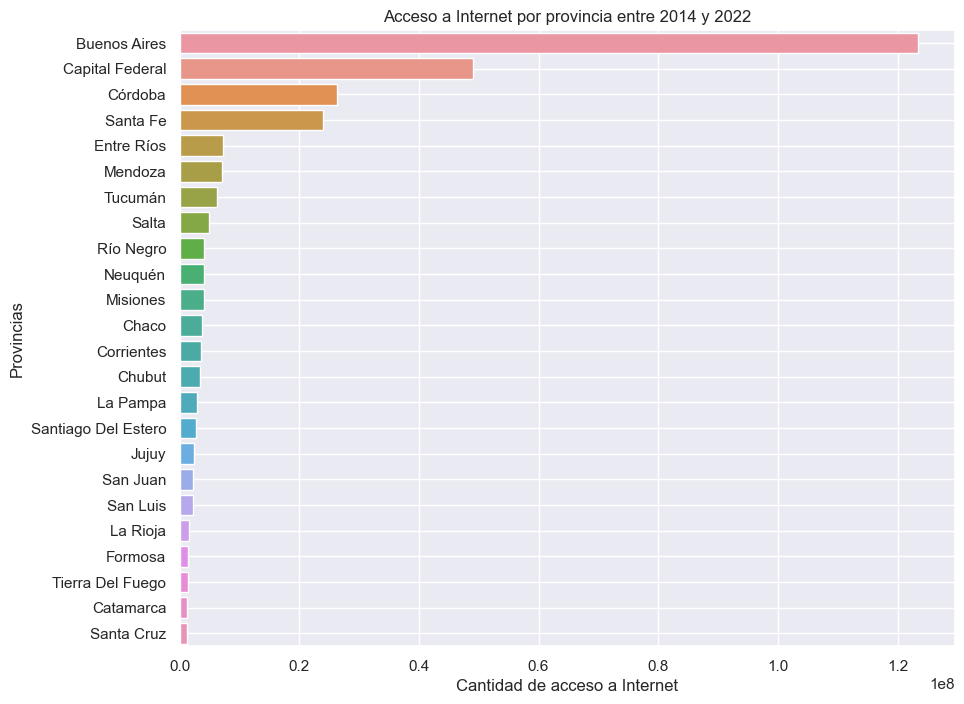

In [8]:
plt.figure(figsize=(10,8))
sns.barplot(data= data, x='Total', y='Provincia')
plt.title('Acceso a Internet por provincia entre 2014 y 2022')
plt.xlabel('Cantidad de acceso a Internet')
plt.grid('True')
plt.ylabel('Provincias')
plt.show()

Muestro en un grafico el progreso de las 5 mejores provincias en función de la cantidad de accesos a Internet

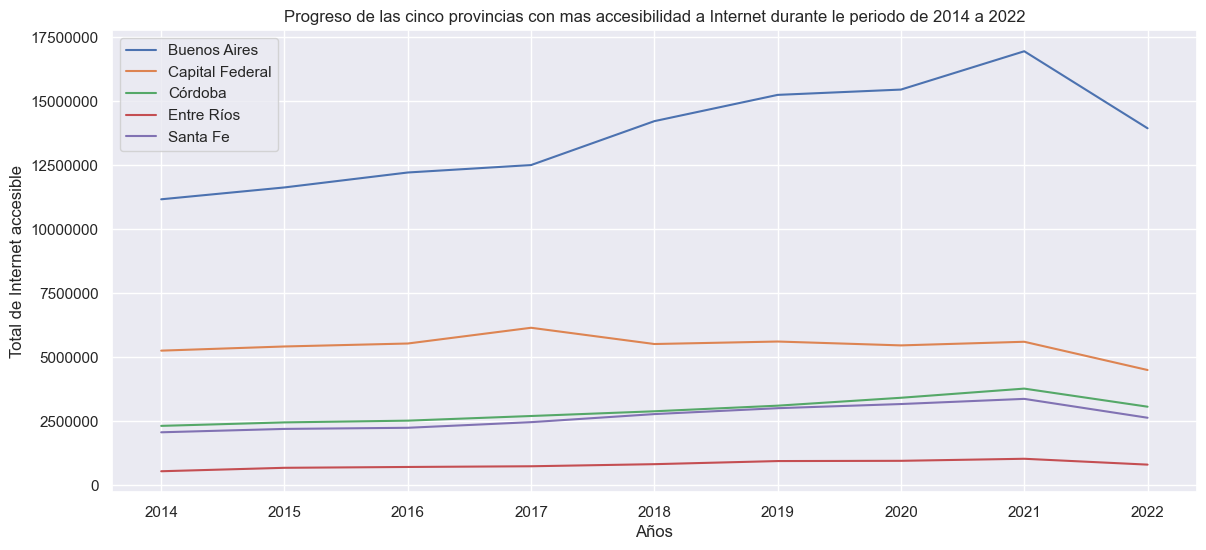

In [9]:
lista = data[:5].Provincia.unique()
d = df.loc[df.Provincia.isin(lista)].groupby(by=['Provincia','Año']).sum()
plt.figure(figsize=(14,6))
sns.lineplot(data = d, x= 'Año', y='Total', hue='Provincia')
plt.ticklabel_format(style='plain', axis='y') # Pongo el eje 'y' con valores numericos de grandes cifras
plt.grid(True)
plt.legend()
plt.title('Progreso de las cinco provincias con mas accesibilidad a Internet durante le periodo de 2014 a 2022')
plt.xlabel('Años')
plt.ylabel('Total de Internet accesible')
plt.show()

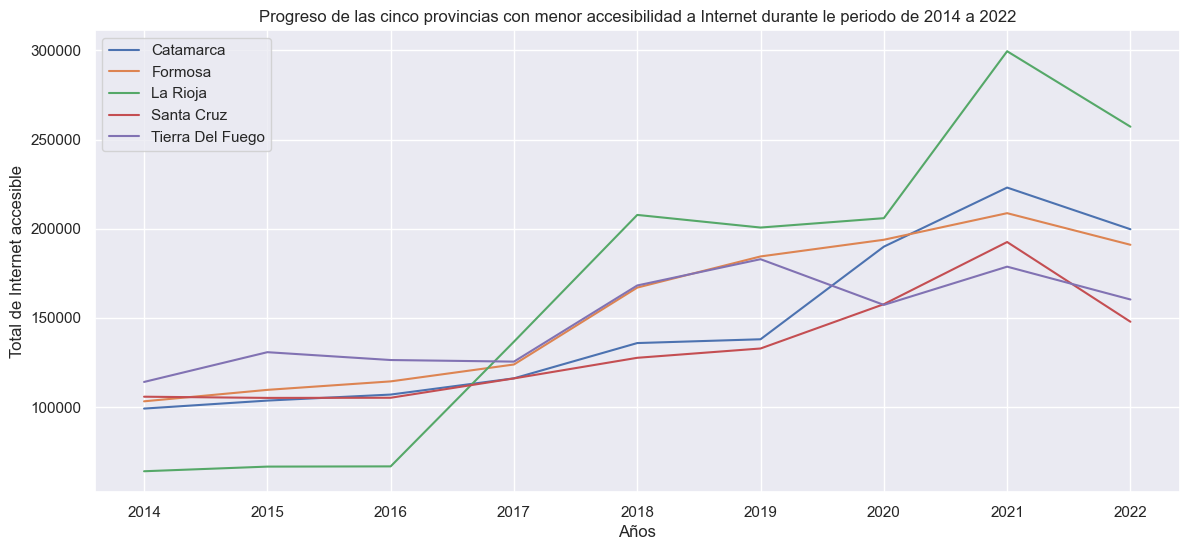

In [10]:
lista = data[-5:].Provincia.unique()
d = df.loc[df.Provincia.isin(lista)].groupby(by=['Provincia','Año']).sum()
plt.figure(figsize=(14,6))
sns.lineplot(data = d, x= 'Año', y='Total', hue='Provincia')
plt.ticklabel_format(style='plain', axis='y') # Pongo el eje 'y' con valores numericos de grandes cifras
plt.grid(True)
plt.legend()
plt.title('Progreso de las cinco provincias con menor accesibilidad a Internet durante le periodo de 2014 a 2022')
plt.xlabel('Años')
plt.ylabel('Total de Internet accesible')
plt.show()

### Dataset `mbps_provincias_trimestral.csv`

In [11]:
velocidad_provincias = pd.read_csv('clean_datasets/mbps_provincias_trimestral.csv')
velocidad_provincias

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,3,Buenos Aires,70
1,2022,3,Capital Federal,101
2,2022,3,Catamarca,61
3,2022,3,Chaco,53
4,2022,3,Chubut,16
...,...,...,...,...
835,2014,1,Santa Cruz,3
836,2014,1,Santa Fe,3
837,2014,1,Santiago Del Estero,3
838,2014,1,Tierra Del Fuego,3


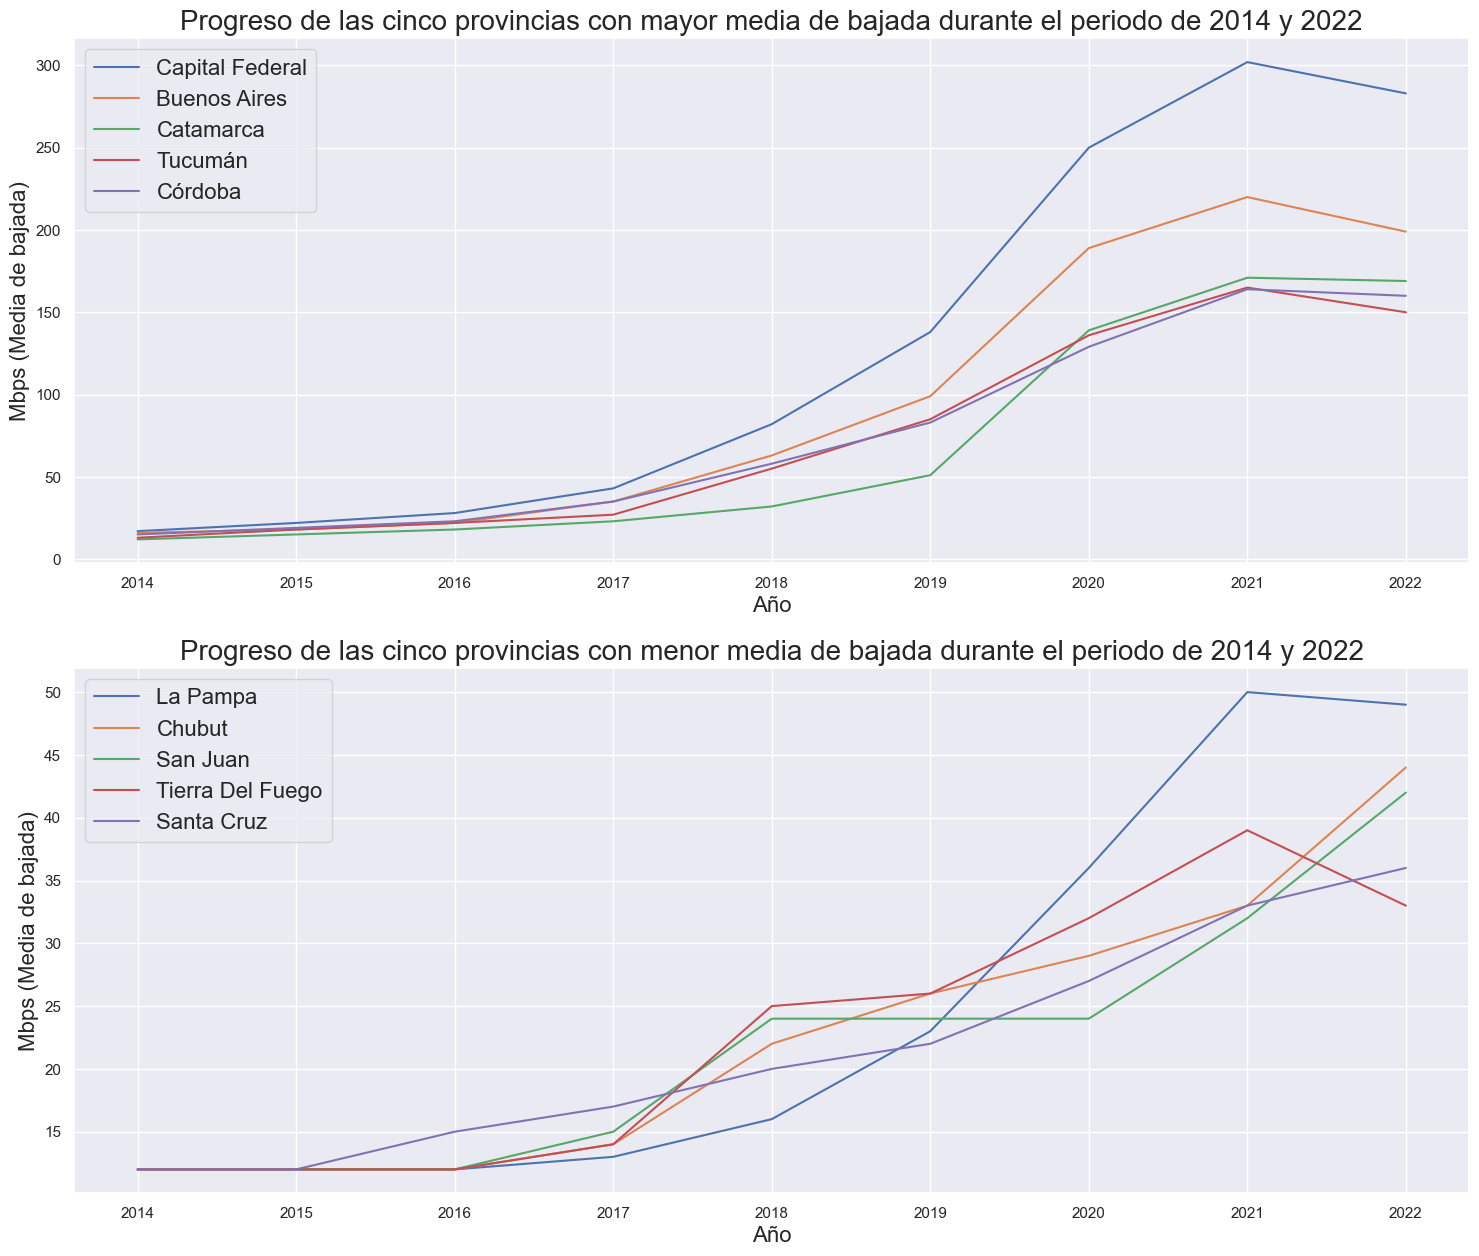

In [12]:
df = velocidad_provincias.groupby(by=['Provincia', 'Año']).sum().reset_index().sort_values(by='Mbps (Media de bajada)', ascending=False)
mejores_provincias = df.loc[df.Provincia.isin(df.Provincia.unique()[:5])]
peores_provincias = df.loc[df.Provincia.isin(df.Provincia.unique()[-5:])]


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

sns.lineplot(data=mejores_provincias, x='Año', y='Mbps (Media de bajada)', hue='Provincia', ax=axes[0], legend='full')
axes[0].set_title('Progreso de las cinco provincias con mayor media de bajada durante el periodo de 2014 y 2022', fontsize=20)

sns.lineplot(data=peores_provincias, x='Año', y='Mbps (Media de bajada)', hue='Provincia', ax=axes[1], legend='full')
axes[1].set_title('Progreso de las cinco provincias con menor media de bajada durante el periodo de 2014 y 2022', fontsize=20)

# Ajustar tamaño de letra en la leyenda
axes[0].legend(fontsize=16)
axes[0].set_xlabel('Año', fontsize=16)
axes[0].set_ylabel('Mbps (Media de bajada)', fontsize=16)

axes[1].legend(fontsize=16)
axes[1].set_xlabel('Año', fontsize=16)
axes[1].set_ylabel('Mbps (Media de bajada)', fontsize=16)

plt.show()

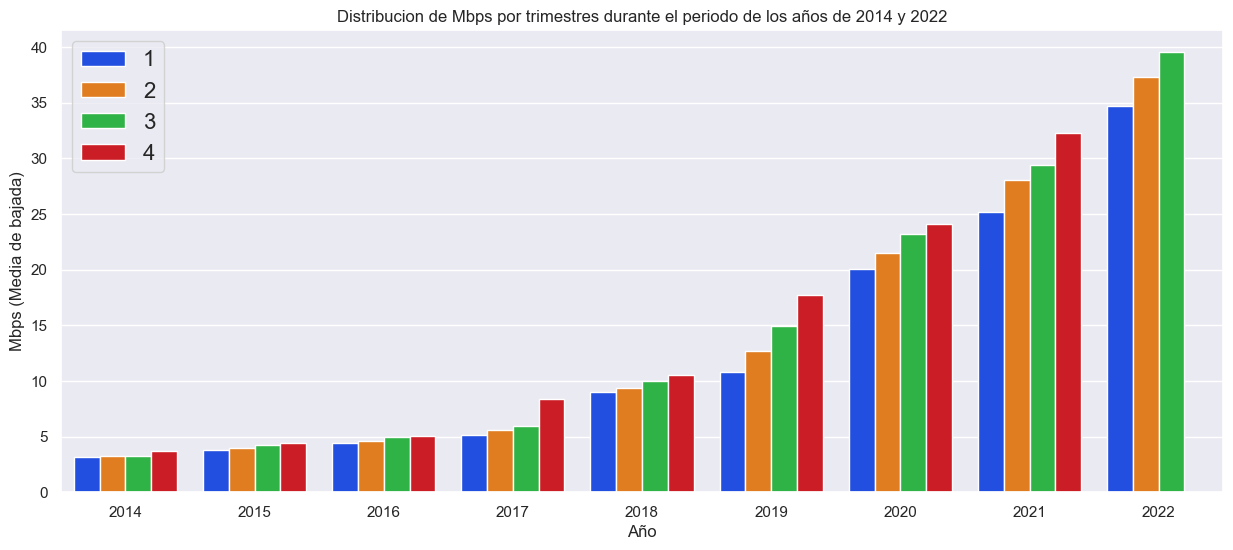

In [13]:
mbps_trimestral = velocidad_provincias.groupby(by=['Año','Trimestre']).mean().reset_index()
plt.figure(figsize=(15,6))
sns.barplot(data = mbps_trimestral, x='Año', y='Mbps (Media de bajada)',hue = 'Trimestre', palette='bright')
plt.title('Distribucion de Mbps por trimestres durante el periodo de los años de 2014 y 2022')
plt.legend(fontsize=16)
plt.show()


### Dataset *Internet_Accesos-por-tecnologia_provincias.csv*

In [14]:
acc_tecnologia_provincias = pd.read_csv('clean_datasets/accesos_provincias_trimestral.csv')

In [15]:
acc_tecnologia_provincias = acc_tecnologia_provincias.drop(acc_tecnologia_provincias.index[-1])
acc_tecnologia_provincias.head()

,id,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Dial up,Otros,Total
0,20223Buenos Aires,2022.0,3.0,Buenos Aires,339648.0,2748325.0,1436433.0,126846.0,6199.0,64217.0,4721668.0
1,20223Capital Federal,2022.0,3.0,Capital Federal,140791.0,1240125.0,129218.0,5758.0,2145.0,29642.0,1547679.0
2,20223Catamarca,2022.0,3.0,Catamarca,10010.0,10495.0,46224.0,1329.0,1.0,2234.0,70293.0
3,20223Chaco,2022.0,3.0,Chaco,27164.0,61800.0,44645.0,8178.0,5.0,2354.0,144146.0
4,20223Chubut,2022.0,3.0,Chubut,45377.0,72212.0,9574.0,29784.0,904.0,7927.0,165778.0


In [16]:
acc_tecnologia_provincias.dtypes

id               object
Año             float64
Trimestre       float64
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Dial up         float64
Otros           float64
Total           float64
dtype: object

In [17]:
adsl = acc_tecnologia_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='ADSL', ascending=False)
cablemodem = acc_tecnologia_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='Cablemodem', ascending=False)
fibra_optica = acc_tecnologia_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='Fibra óptica', ascending=False)
Wireless = acc_tecnologia_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='Wireless', ascending=False)
otros = acc_tecnologia_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='Otros', ascending=False)
total = acc_tecnologia_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='Total', ascending=False)

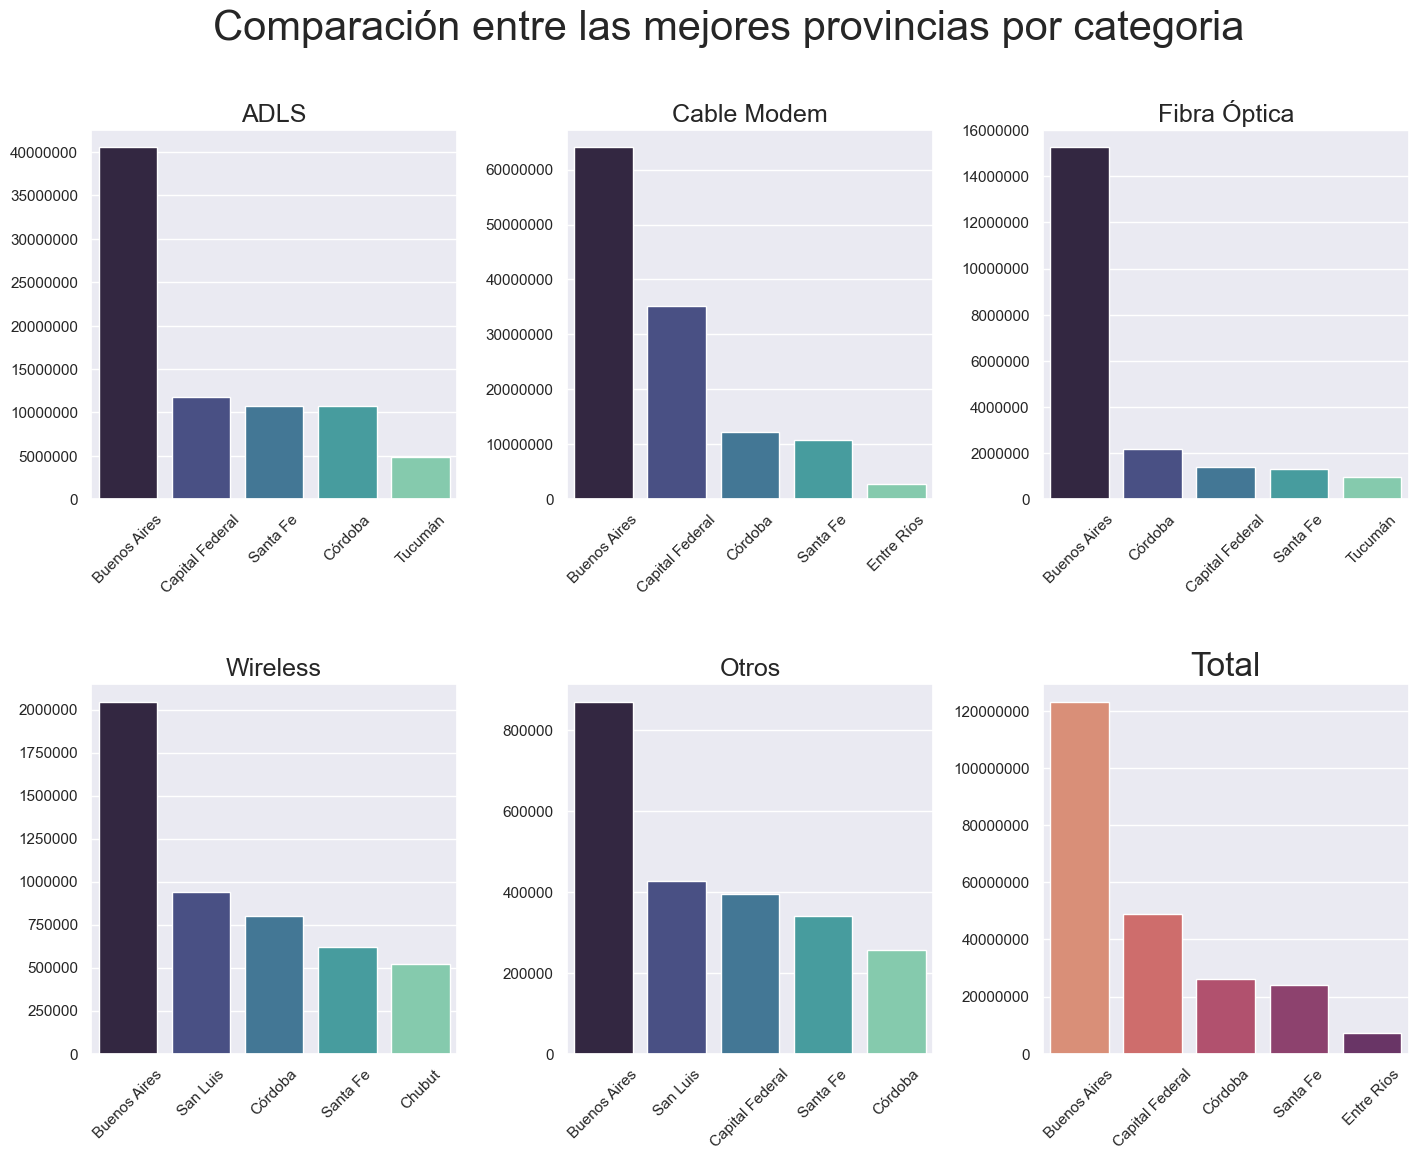

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,12))
# ADLS
sns.barplot(data=adsl[:5], x='Provincia', y='ADSL', ax=axes[0,0], palette="mako")
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
axes[0,0].ticklabel_format(style='plain', axis='y')
axes[0,0].set_title('ADLS', fontsize=18)
axes[0,0].set_ylabel('')
axes[0, 0].set_xlabel('')

# Cablemodem
sns.barplot(data=cablemodem[:5], x='Provincia', y='Cablemodem', ax=axes[0, 1], palette="mako")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
axes[0, 1].ticklabel_format(style='plain', axis='y')
axes[0, 1].set_title('Cable Modem', fontsize=18)
axes[0, 1].set_ylabel('')
axes[0, 1].set_xlabel('')

# Fibra Óptica
sns.barplot(data=fibra_optica[:5], x='Provincia', y='Fibra óptica',ax=axes[0,2], palette="mako")
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45)
axes[0, 2].ticklabel_format(style='plain', axis='y')
axes[0, 2].set_title('Fibra Óptica', fontsize=18)
axes[0, 2].set_ylabel('')
axes[0, 2].set_xlabel('')

# Wireless
sns.barplot(data=Wireless[:5], x='Provincia', y='Wireless',ax=axes[1,0], palette="mako")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1, 0].ticklabel_format(style='plain', axis='y')
axes[1, 0].set_title('Wireless', fontsize=18)
axes[1, 0].set_ylabel('')
axes[1, 0].set_xlabel('')

# Otros
sns.barplot(data=otros[:5], x='Provincia', y='Otros',ax=axes[1,1], palette="mako")
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
axes[1, 1].ticklabel_format(style='plain', axis='y')
axes[1, 1].set_title('Otros', fontsize=18)
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlabel('')

# Total
sns.barplot(data=total[:5], x='Provincia', y='Total',ax=axes[1, 2], palette="flare")
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45)
axes[1, 2].ticklabel_format(style='plain', axis='y')
axes[1, 2].set_title('Total', fontsize=24)
axes[1, 2].set_ylabel('')
axes[1, 2].set_xlabel('')


fig.suptitle('Comparación entre las mejores provincias por categoria', fontsize=30)
fig.subplots_adjust(hspace=0.5, wspace=0.3) # Para agregar mas separación entre los subplots

#### Ahora quiero realizar el mismo grafico que arriba pero con las provincias con menor acceso por cada categoria de telecomunicación

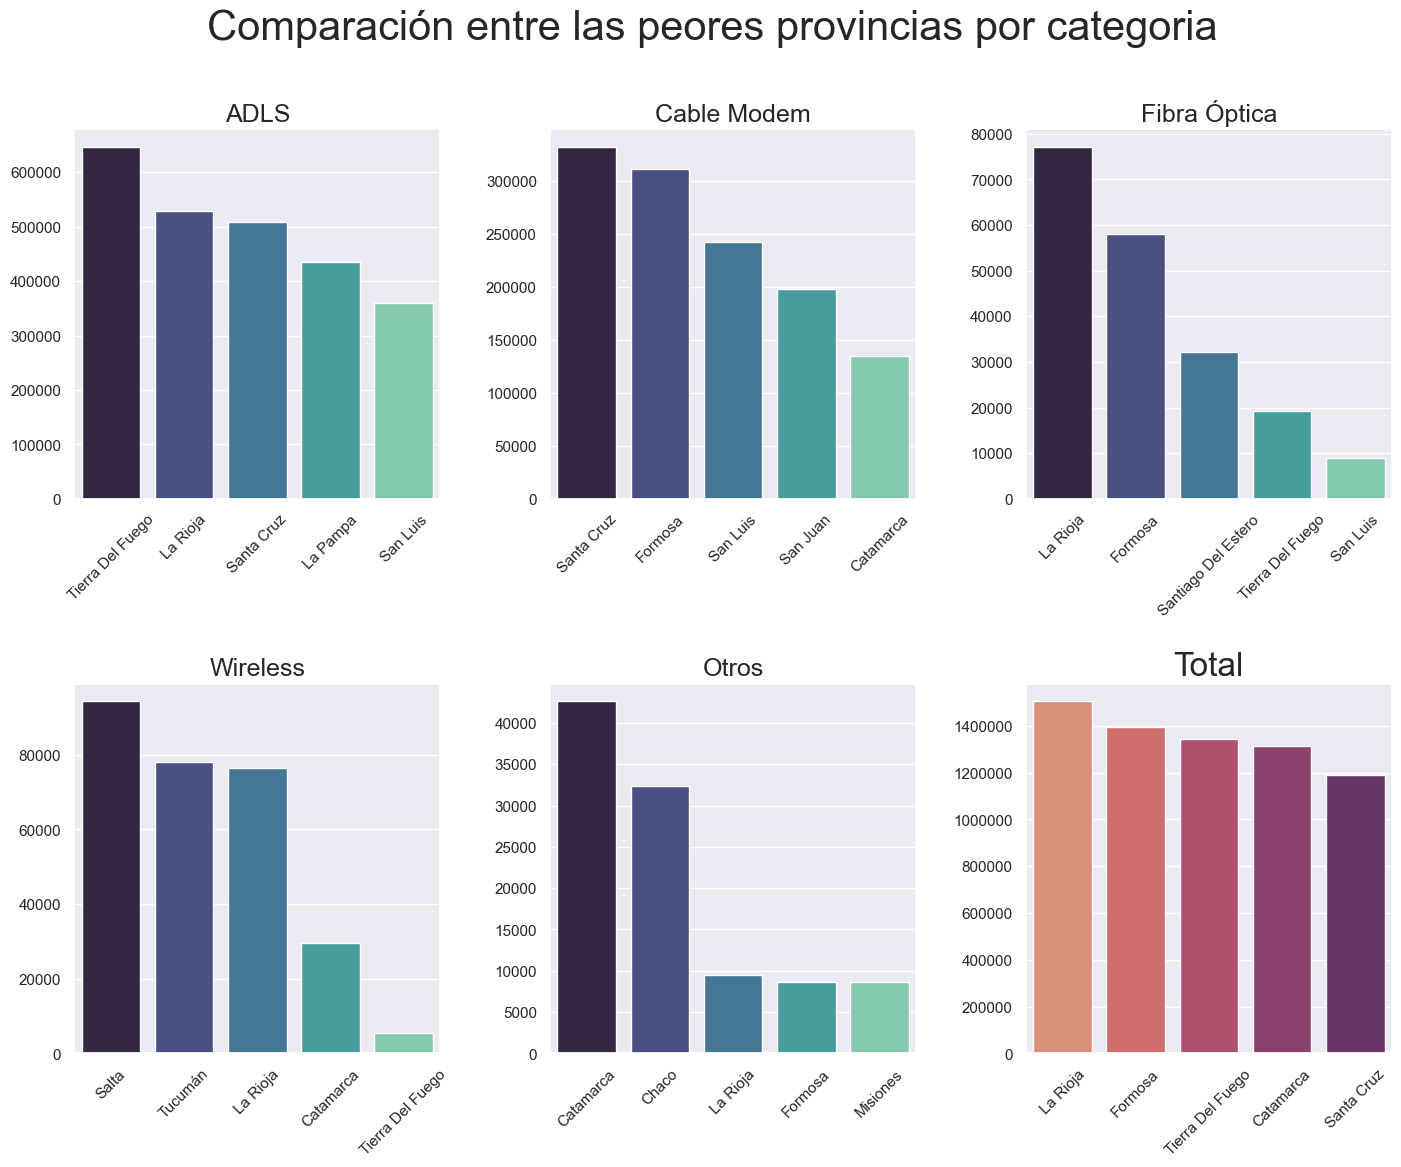

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,12))
# ADLS
sns.barplot(data=adsl[-5:], x='Provincia', y='ADSL', ax=axes[0,0], palette="mako")
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
axes[0,0].ticklabel_format(style='plain', axis='y')
axes[0,0].set_title('ADLS', fontsize=18)
axes[0,0].set_ylabel('')
axes[0, 0].set_xlabel('')

# Cablemodem
sns.barplot(data=cablemodem[-5:], x='Provincia', y='Cablemodem', ax=axes[0, 1], palette="mako")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
axes[0, 1].ticklabel_format(style='plain', axis='y')
axes[0, 1].set_title('Cable Modem', fontsize=18)
axes[0, 1].set_ylabel('')
axes[0, 1].set_xlabel('')

# Fibra Óptica
sns.barplot(data=fibra_optica[-5:], x='Provincia', y='Fibra óptica',ax=axes[0,2], palette="mako")
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45)
axes[0, 2].ticklabel_format(style='plain', axis='y')
axes[0, 2].set_title('Fibra Óptica', fontsize=18)
axes[0, 2].set_ylabel('')
axes[0, 2].set_xlabel('')

# Wireless
sns.barplot(data=Wireless[-5:], x='Provincia', y='Wireless',ax=axes[1,0], palette="mako")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1, 0].ticklabel_format(style='plain', axis='y')
axes[1, 0].set_title('Wireless', fontsize=18)
axes[1, 0].set_ylabel('')
axes[1, 0].set_xlabel('')

# Otros
sns.barplot(data=otros[-5:], x='Provincia', y='Otros',ax=axes[1,1], palette="mako")
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
axes[1, 1].ticklabel_format(style='plain', axis='y')
axes[1, 1].set_title('Otros', fontsize=18)
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlabel('')

# Total
sns.barplot(data=total[-5:], x='Provincia', y='Total',ax=axes[1, 2], palette="flare")
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45)
axes[1, 2].ticklabel_format(style='plain', axis='y')
axes[1, 2].set_title('Total', fontsize=24)
axes[1, 2].set_ylabel('')
axes[1, 2].set_xlabel('')


fig.suptitle('Comparación entre las peores provincias por categoria', fontsize=30)
fig.subplots_adjust(hspace=0.5, wspace=0.3) # Para agregar mas separación entre los subplots

### Datasets *Internet_Penetracion_hogares.csv*

Convierto las columnas en valores numericos

In [20]:
internet_hogares = pd.read_csv('clean_datasets/acceso_por_hogares_habitantes_pais_trimestral.csv')

In [21]:
data = internet_hogares.groupby(by=['Año','Trimestre']).mean().reset_index()

<AxesSubplot: xlabel='Año', ylabel='Accesos por cada 100 hab'>

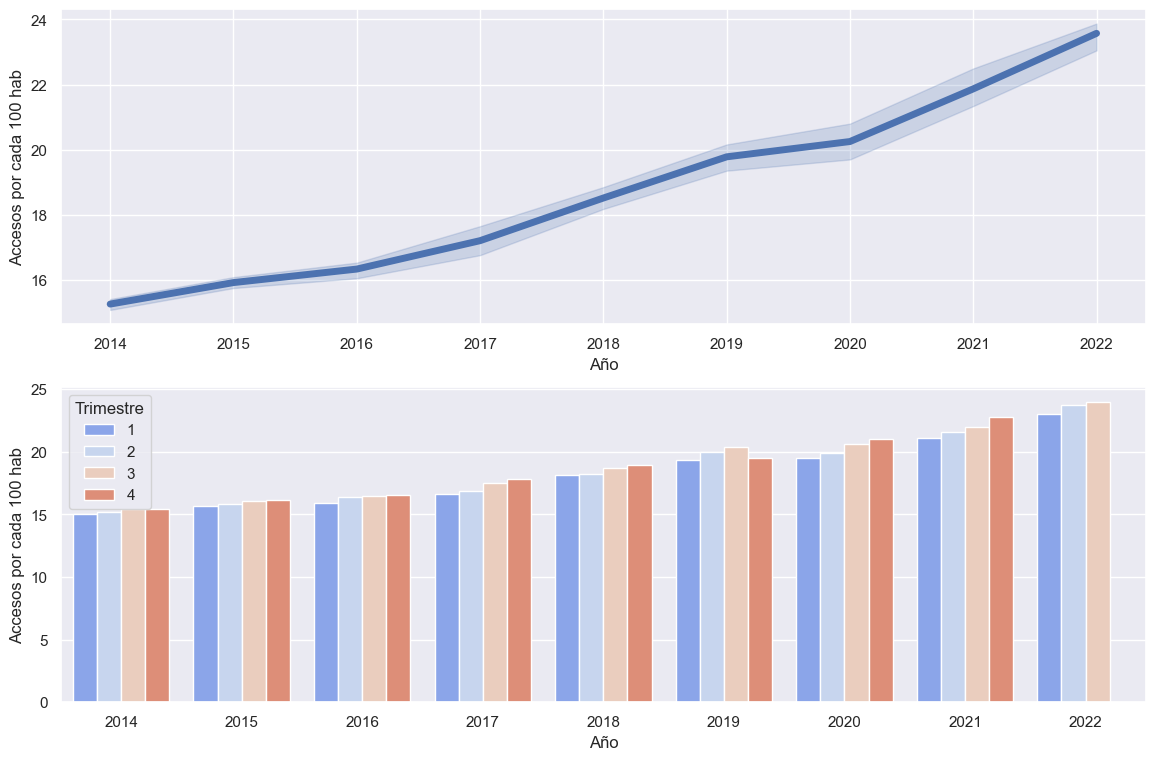

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,9))
sns.lineplot(data = data, x='Año', y='Accesos por cada 100 hab', ax=ax[0], linewidth=5, linestyle='-')
ax[0].grid(True)

sns.barplot(data = data, x='Año', y='Accesos por cada 100 hab',hue='Trimestre', ax=ax[1], palette='coolwarm')

In [23]:
data.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2014,1,49.55,15.05
1,2014,2,49.86,15.16
2,2014,3,50.67,15.43
3,2014,4,50.50,15.39
4,2015,1,51.36,15.68


In [24]:
internet_velocidad = pd.read_csv('clean_datasets/velocidad_pais_trimestral.csv')
internet_velocidad.sample(5)

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
11,2019,4,38.272,28.980,2.792.307,1.046.128,851.619,1.004.083,2.830.746,201.046,8.793.181
33,2014,2,41.064,656.408,5.149.574,341.689,147.273,478,12.259,0.000,6.348.745
24,2016,3,20.104,294.413,4.816.081,936.533,919.208,124.564,31.022,0.000,7.141.925
26,2016,1,30.428,404.810,4.944.358,762.999,641.646,27.664,23.380,0.000,6.835.285
32,2014,3,37.430,608.018,5.153.437,373.372,182.483,507,12.424,0.000,6.367.671


In [25]:
for column in internet_velocidad:
    internet_velocidad[column] = pd.to_numeric(internet_velocidad[column].astype(str).str.replace('.',''))

In [26]:
internet_velocidad.dtypes

Año                        int64
Trimestre                  int64
Hasta 512 kbps             int64
Entre 512 Kbps y 1 Mbps    int64
Entre 1 Mbps y 6 Mbps      int64
Entre 6 Mbps y 10 Mbps     int64
Entre 10 Mbps y 20 Mbps    int64
Entre 20 Mbps y 30 Mbps    int64
Más de 30 Mbps             int64
OTROS                      int64
Total                      int64
dtype: object

---

In [27]:
internet_velocidad_prov = pd.read_csv('clean_datasets/velocidad_provincias_trimestral.csv')
columns = ['HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total']

for column in columns:
    internet_velocidad_prov[column] = pd.to_numeric(internet_velocidad_prov[column].fillna(0).astype(str).str.replace('.',''))

In [28]:
internet_velocidad_prov.dtypes

Año                     int64
Trimestre               int64
Provincia              object
HASTA 512 kbps          int64
+ 512 Kbps - 1 Mbps     int64
+ 1 Mbps - 6 Mbps       int64
+ 6 Mbps - 10 Mbps      int64
+ 10 Mbps - 20 Mbps     int64
+ 20 Mbps - 30 Mbps     int64
+ 30 Mbps               int64
OTROS                   int64
Total                   int64
dtype: object

In [29]:
data_internet = internet_velocidad.groupby(by='Año').mean().reset_index()
data_internet.sample(3)

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
2,2016,2.5,28816.0,238128.25,4873064.75,866906.00,846160.5,98931.75,30503.00,0.00,7073592.50
3,2017,2.5,19270.5,223099.00,4208996.00,1008415.75,1448661.0,356924.50,182493.50,38786.25,7486646.50
6,2020,2.5,22570.5,24169.00,2640485.75,1047253.25,802047.5,544183.25,3876269.75,193774.75,9192810.75


In [30]:
columns = ['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps',
       'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
       'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps',
       'OTROS', 'Total']

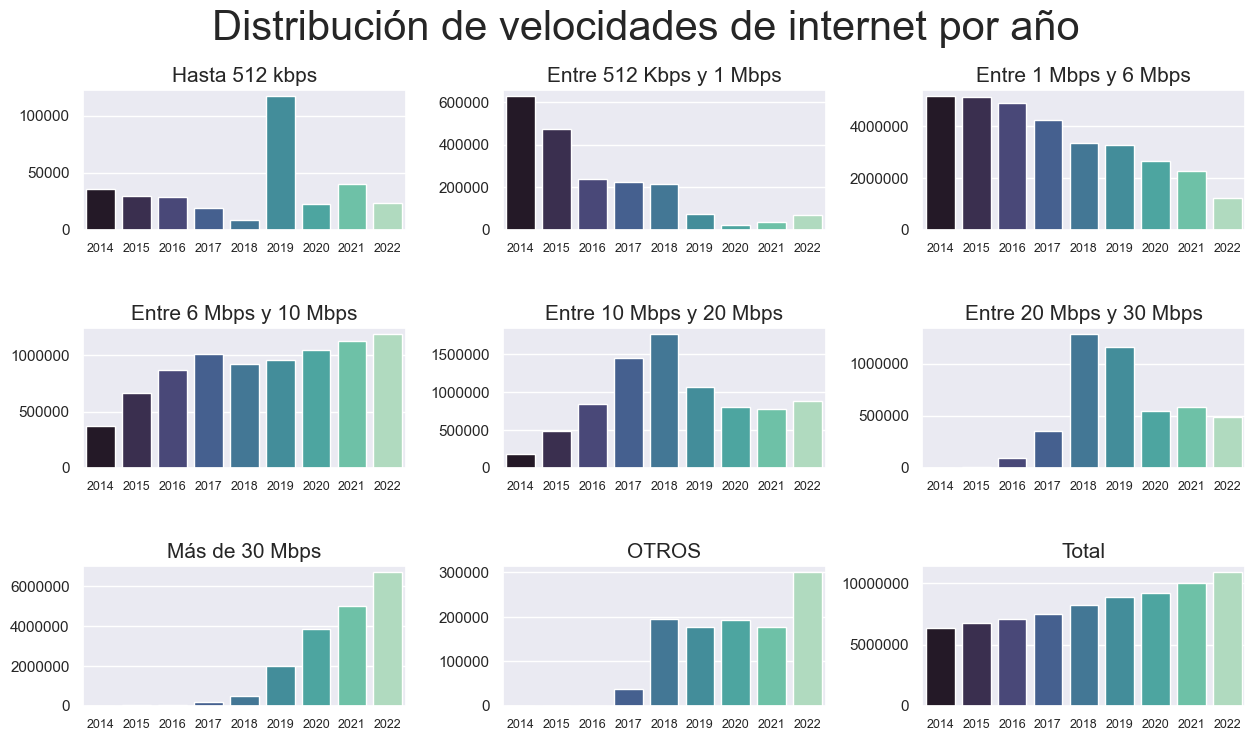

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,8))

for index, ax in enumerate(axes.flatten()):
    sns.barplot(data = data_internet, x='Año', y=columns[index], ax=ax, palette='mako')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=9)
    ax.ticklabel_format(style='plain', axis='y')
    ax.set_title(columns[index], fontsize=15)
    ax.set_ylabel('')
    ax.set_xlabel('')

fig.suptitle('Distribución de velocidades de internet por año', fontsize=30)
fig.subplots_adjust(hspace=0.7, wspace=0.3) # Para agregar mas separación entre los subplots


In [32]:
data_internet

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2014,2.5,35391.500000,626698.50,5129465.25,375123.50,176784.25,1.425250e+03,1.287675e+04,0.00,6.366187e+06
1,2015,2.5,29906.750000,475066.25,5099324.00,661246.75,489822.25,1.208925e+04,1.943075e+04,0.00,6.794768e+06
2,2016,2.5,28816.000000,238128.25,4873064.75,866906.00,846160.50,9.893175e+04,3.050300e+04,0.00,7.073592e+06
3,2017,2.5,19270.500000,223099.00,4208996.00,1008415.75,1448661.00,3.569245e+05,1.824935e+05,38786.25,7.486646e+06
4,2018,2.5,8207.500000,214164.50,3332212.75,924543.25,1763424.25,1.280622e+06,4.916810e+05,195975.50,8.242047e+06
5,2019,2.5,116709.250000,72200.25,3243665.25,956741.25,1073116.25,1.160052e+06,1.990550e+06,176288.25,8.891545e+06
6,2020,2.5,22570.500000,24169.00,2640485.75,1047253.25,802047.50,5.441832e+05,3.876270e+06,193774.75,9.192811e+06
7,2021,2.5,40273.750000,38414.00,2272046.25,1123526.50,779467.00,5.845108e+05,5.005438e+06,177921.50,1.002160e+07
8,2022,2.0,23389.666667,68903.00,1205911.00,1186028.00,882525.00,4.916577e+05,6.691286e+06,299654.00,1.089127e+07


In [33]:
def velocidades_por_año(año):
    # Filtrar los datos para el año seleccionado
    data_internet_año = data_internet[data_internet.Año == año]

    # Convertir las columnas de velocidades de Internet en una sola columna
    data_internet_melted = pd.melt(data_internet_año, id_vars=['Año', 'Trimestre','Total'], var_name='Velocidad', value_name='Cantidad')

    plt.figure(figsize=(15,5.5))

    # Graficar el barplot con todas las velocidades del año seleccionado
    sns.barplot(data=data_internet_melted, y='Velocidad', x='Cantidad')

    # Configuración adicional
    plt.ylabel('Velocidad', fontsize=20)
    plt.ticklabel_format(style='plain', axis='x')
    plt.xlabel('Cantidad', fontsize=20)
    plt.title(f'Velocidades de Internet - Año {año}', fontsize=26)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=14)


    # Mostrar el gráfico
    plt.show()

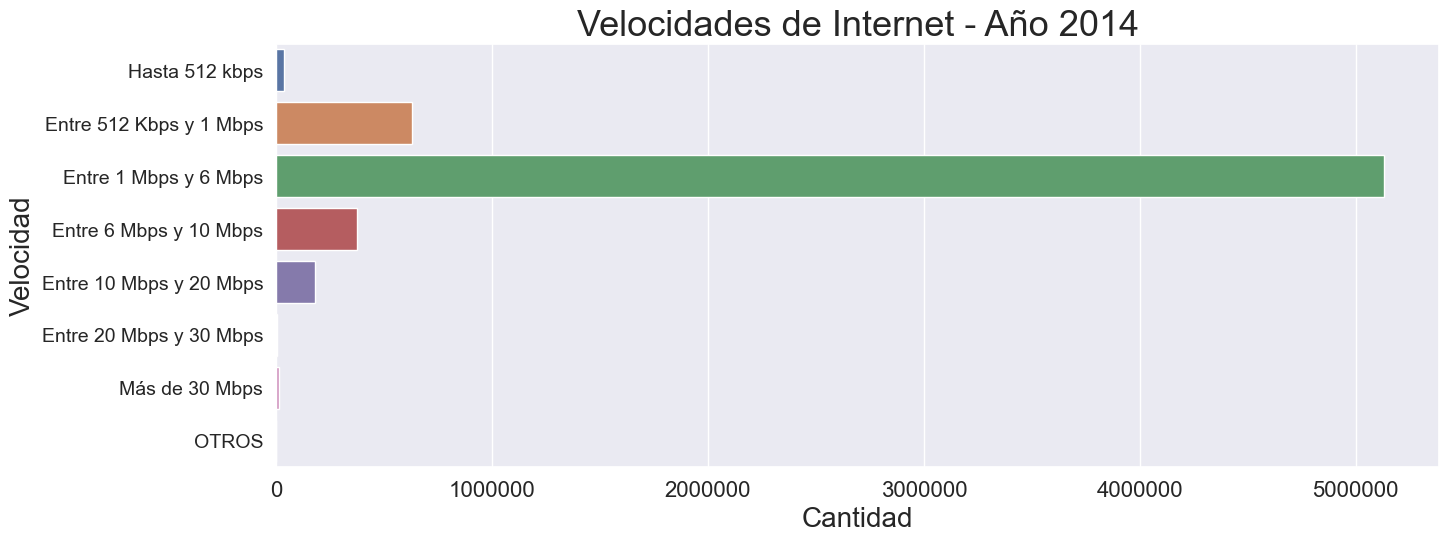

In [34]:
velocidades_por_año(2014)

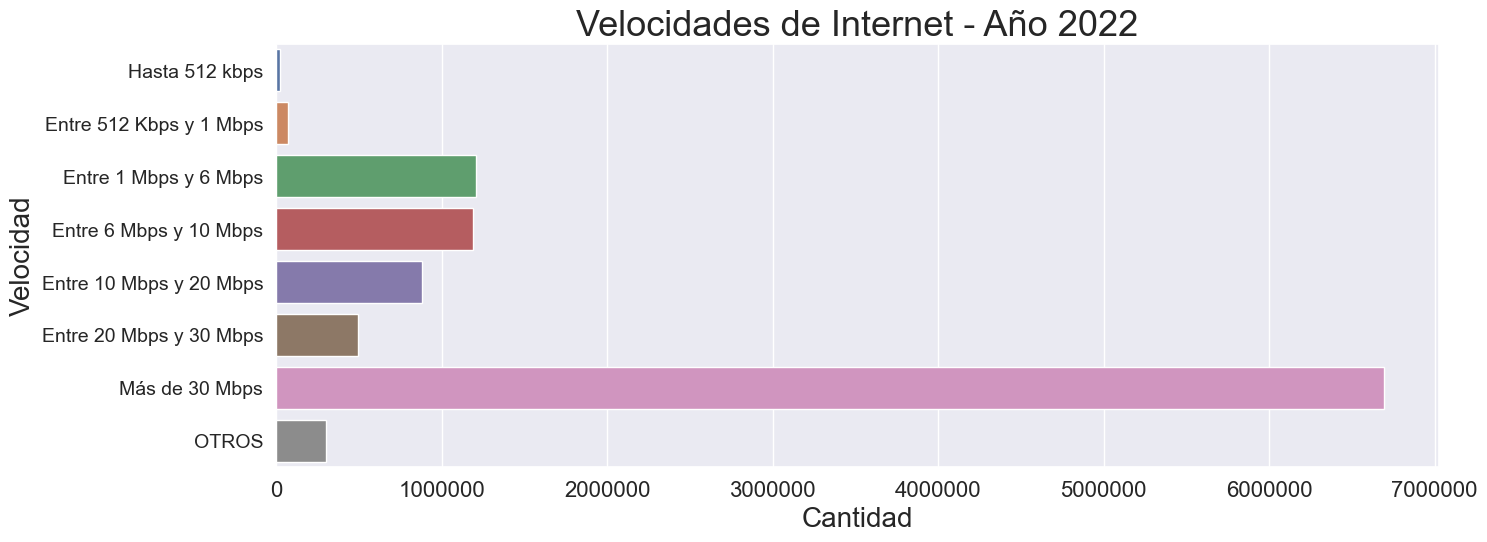

In [35]:
velocidades_por_año(2022)

Quiero comparar como fue el avanze de las velocidades durante el perdiodo de los 9 años, comparando en un mimso grafico las velocidades del año 2014 con las del 2022

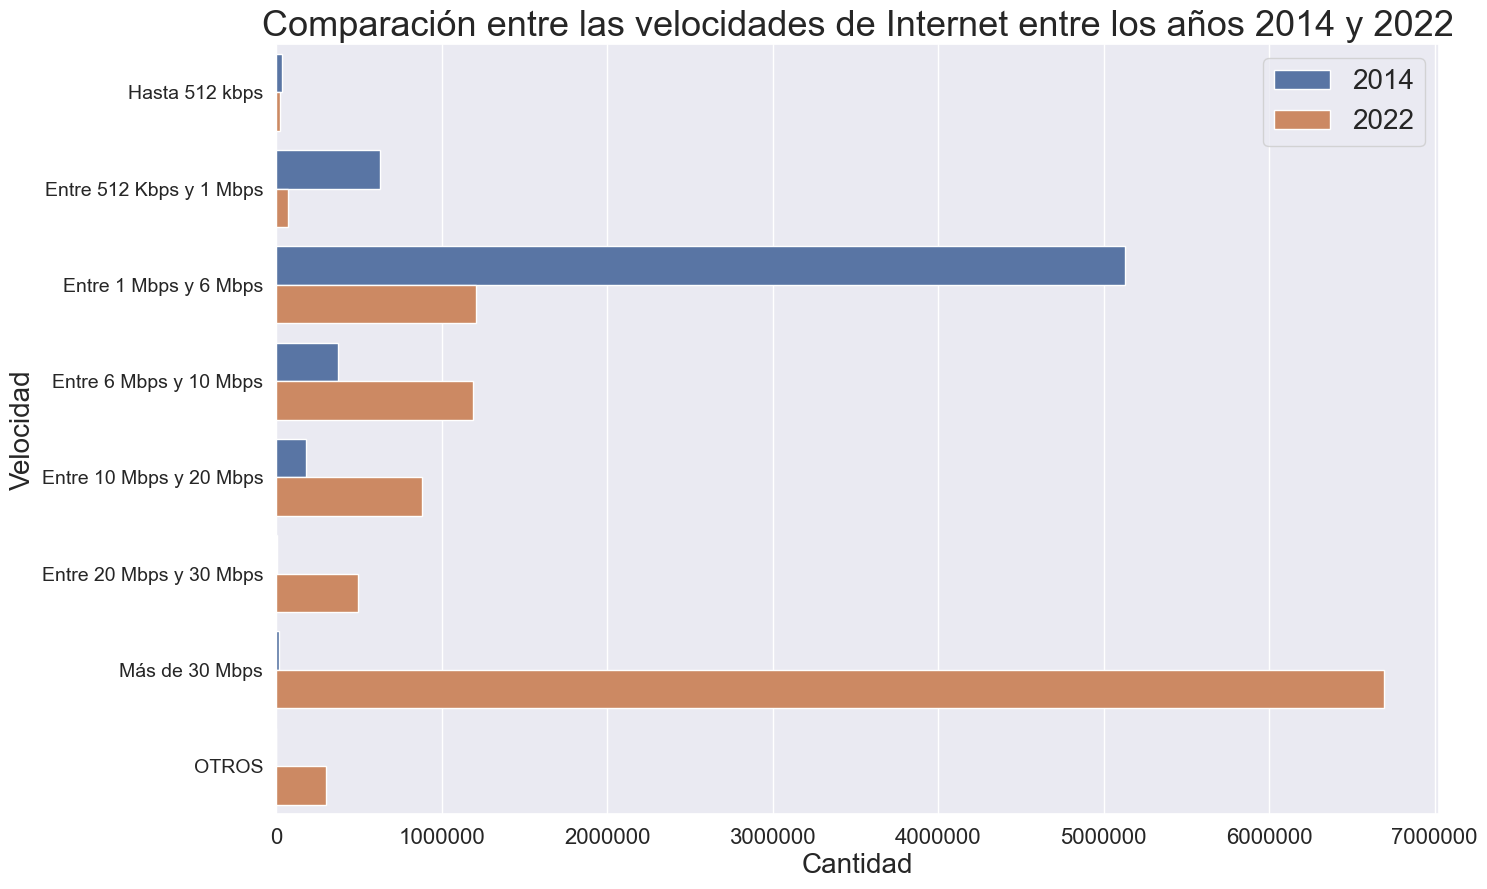

In [36]:
data_internet_año = data_internet[(data_internet.Año == 2014) | (data_internet.Año == 2022)]

# Convertir las columnas de velocidades de Internet en una sola columna
data_internet_melted = pd.melt(data_internet_año, id_vars=['Año', 'Trimestre','Total'], var_name='Velocidad', value_name='Cantidad')

plt.figure(figsize=(15,10))

# Graficar el barplot con todas las velocidades del año seleccionado
sns.barplot(data=data_internet_melted, y='Velocidad', x='Cantidad', hue='Año')

# Configuración adicional
plt.ylabel('Velocidad', fontsize=20)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Cantidad', fontsize=20)
plt.title(f'Comparación entre las velocidades de Internet entre los años 2014 y 2022', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)

# Mostrar el gráfico
plt.show()

Este grafico muestre el progreso que habo en la Republica Argentina en el ambito de las velocidades del Internet

Hago uan compración de los años en varios subplots

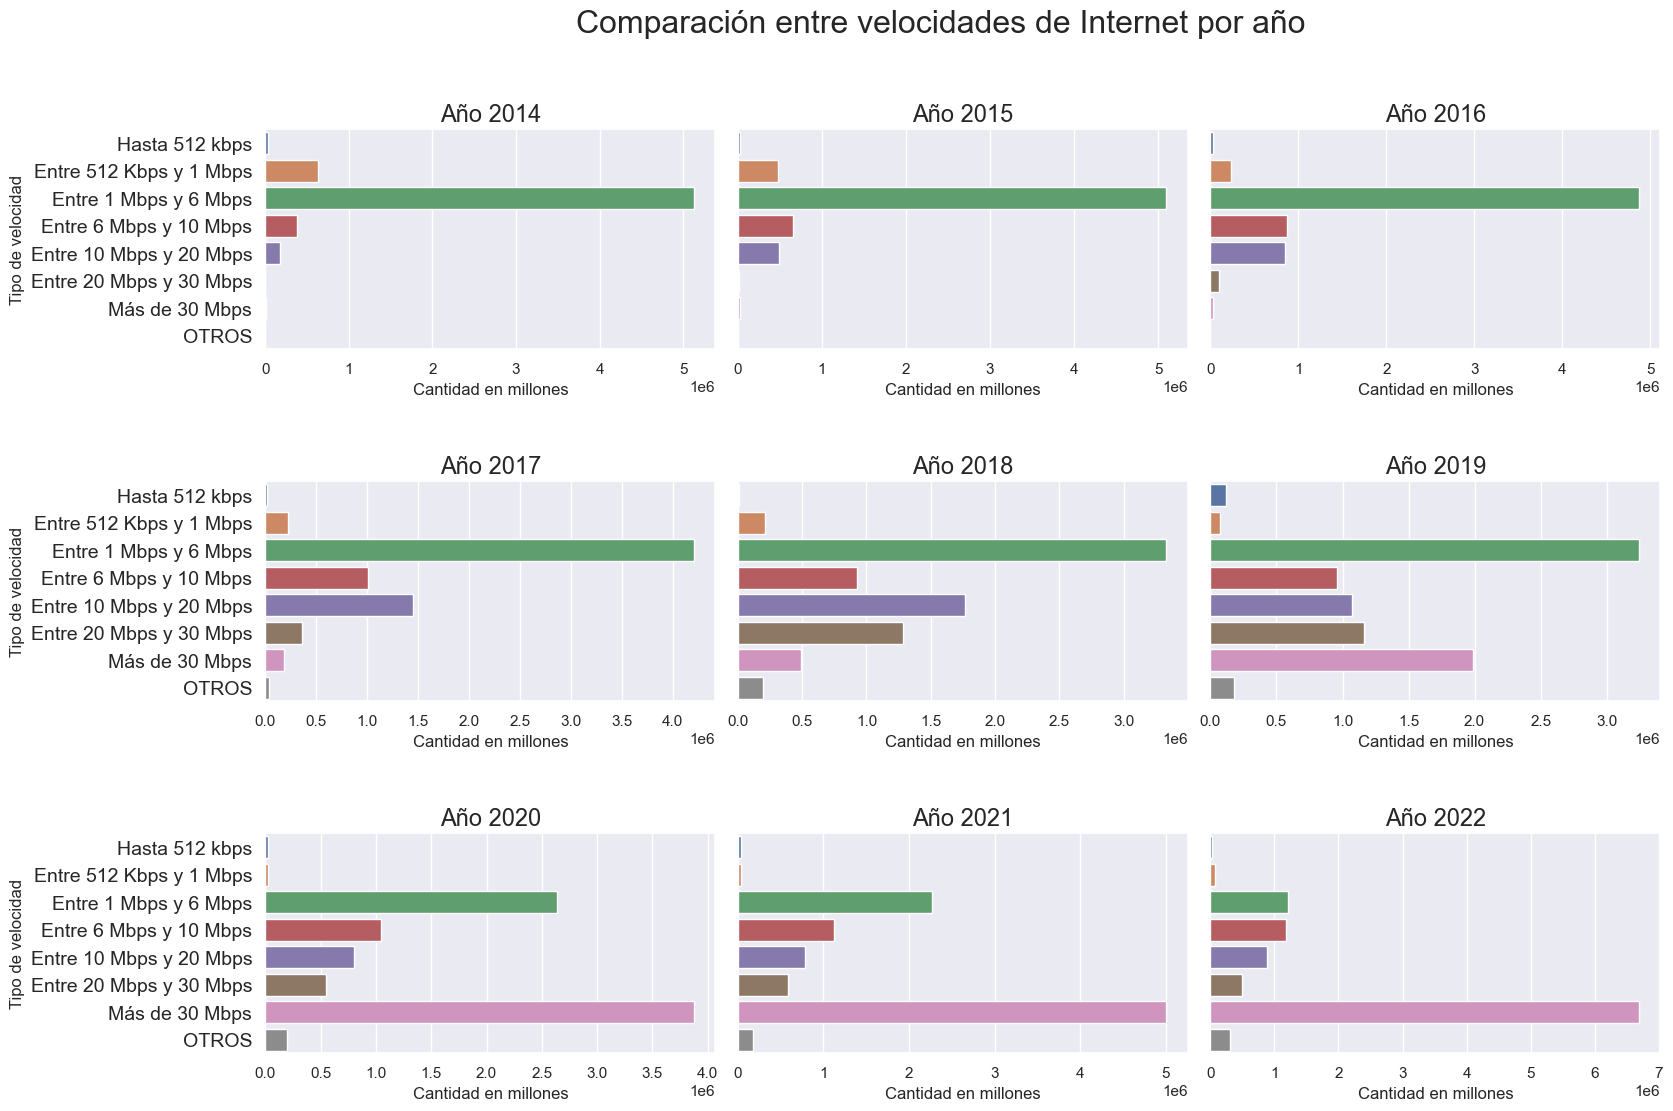

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18,12))
años = data_internet.Año.unique()
for index, ax in enumerate(axes.flatten()):
    data_internet_año = data_internet[data_internet.Año == años[index]]
    data_internet_melted = pd.melt(data_internet_año, id_vars=['Año', 'Trimestre','Total'], var_name='Tipo de velocidad', value_name='Cantidad en millones')
    sns.barplot(data = data_internet_melted, x='Cantidad en millones', y='Tipo de velocidad', ax=ax)
    if ax not in [axes[0, 0], axes[1, 0], axes[2, 0]]:
        ax.set_ylabel("")
        ax.set_yticks([])
    #if ax not in [axes[2, 0], axes[2, 1], axes[2, 2]]:
        #ax.set_xlabel('')
    ax.set_title(f'Año {años[index]}', fontsize=17)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=14)

plt.suptitle('Comparación entre velocidades de Internet por año', fontsize=23)
plt.subplots_adjust(hspace=0.6, wspace=0.05)


---

### Dataset *Internet_BAF.csv*

Dial up = conexión por línea conmutada

In [38]:
acceso_provincias = pd.read_csv('clean_datasets/accesos_provincias_trimestral.csv')
acceso_provincias.head()

,id,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Dial up,Otros,Total
0,20223Buenos Aires,2022.0,3.0,Buenos Aires,339648.0,2748325.0,1436433.0,126846.0,6199.0,64217.0,4721668.0
1,20223Capital Federal,2022.0,3.0,Capital Federal,140791.0,1240125.0,129218.0,5758.0,2145.0,29642.0,1547679.0
2,20223Catamarca,2022.0,3.0,Catamarca,10010.0,10495.0,46224.0,1329.0,1.0,2234.0,70293.0
3,20223Chaco,2022.0,3.0,Chaco,27164.0,61800.0,44645.0,8178.0,5.0,2354.0,144146.0
4,20223Chubut,2022.0,3.0,Chubut,45377.0,72212.0,9574.0,29784.0,904.0,7927.0,165778.0


Agrupo la data para ver los valores numericos por Año

In [39]:
data = acceso_provincias.groupby(by=['Año']).sum().reset_index().sort_values(by=['Año','Trimestre'], ascending=False)
data.head(10)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Dial up,Otros,Total
8,2022.0,144.0,4396850.0,18084610.0,7814359.0,1517156.0,37492.0,684167.0,32673821.0
7,2021.0,240.0,7802044.0,22877010.0,6473506.0,1700796.0,43616.0,962069.0,40086391.0
6,2020.0,240.0,9072828.0,20539964.0,4636620.0,1599462.0,40039.0,894752.0,36771243.0
5,2019.0,240.0,12188858.0,18754974.0,2450177.0,1179239.0,10128.0,193644.0,35566181.0
4,2018.0,240.0,13981984.0,16571272.0,1079124.0,908459.0,102609.0,388964.0,32968187.0
3,2017.0,240.0,14639302.0,14148063.0,766312.0,440125.0,112863.0,270550.0,30330683.0
2,2016.0,240.0,15073814.0,12177088.0,680127.0,339817.0,122282.0,199731.0,28496058.0
1,2015.0,240.0,15115694.0,11162971.0,620877.0,340431.0,136270.0,156589.0,27473819.0
0,2014.0,240.0,14884750.0,9975087.0,604862.0,321947.0,147760.0,248449.0,26056633.0


In [40]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,12))

for index, ax in enumerate(axes.flatten()):
    sns.scatterplot(data = data, x = )

SyntaxError: invalid syntax (3462425702.py, line 4)

### Dataset *internet_fijo_tecnologia_localidades.csv*

In [41]:
internet_fijo_tech_localidades = pd.read_csv('clean_datasets/internet_fijo_localidades_partidos.csv')
internet_fijo_tech_localidades.sample(5)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
3076,TUCUMAN,Burruyacú,Villa Burruyacú,90007100,0,0,0,12,0,2,0,3,17
1094,CORDOBA,Punilla,Estancia Vieja,14091090,0,0,0,0,0,0,0,216,216
459,BUENOS AIRES,Mercedes,Mercedes,6532020,1214,6309,59,2760,59,3,0,1588,11992
670,BUENOS AIRES,Trenque Lauquen,Berutti,6826010,0,0,0,282,0,0,0,0,282
2363,SALTA,Rivadavia,Santa Victoria Este,66133100,17,0,0,1,10,1,0,41,70


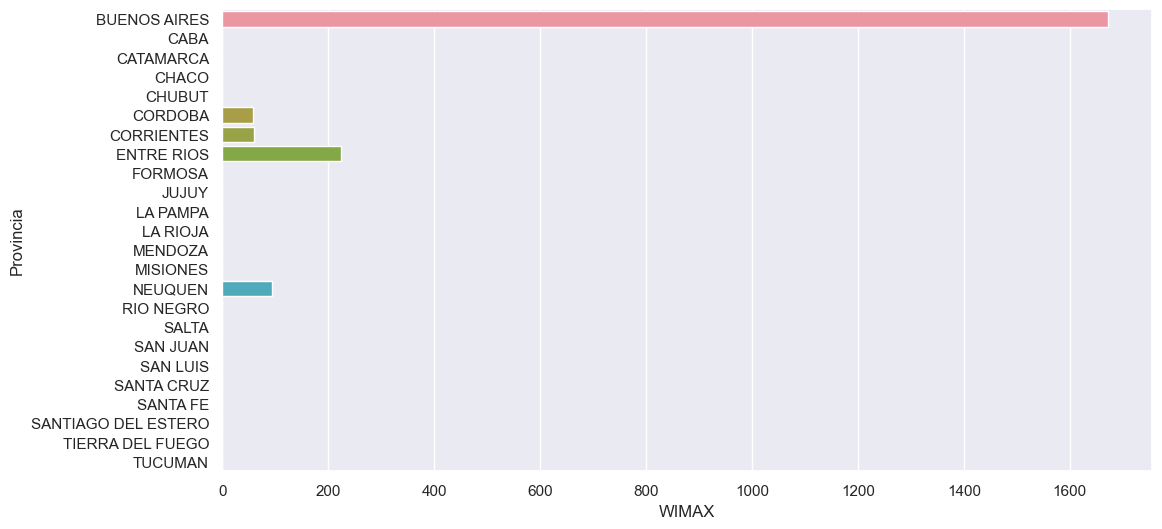

In [42]:
data = internet_fijo_tech_localidades.groupby(by='Provincia').sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data = data, x='WIMAX',y='Provincia')
plt.show()

In [43]:
columns = ['ADSL', 'CABLEMODEM',
       'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS',
       'Total general']

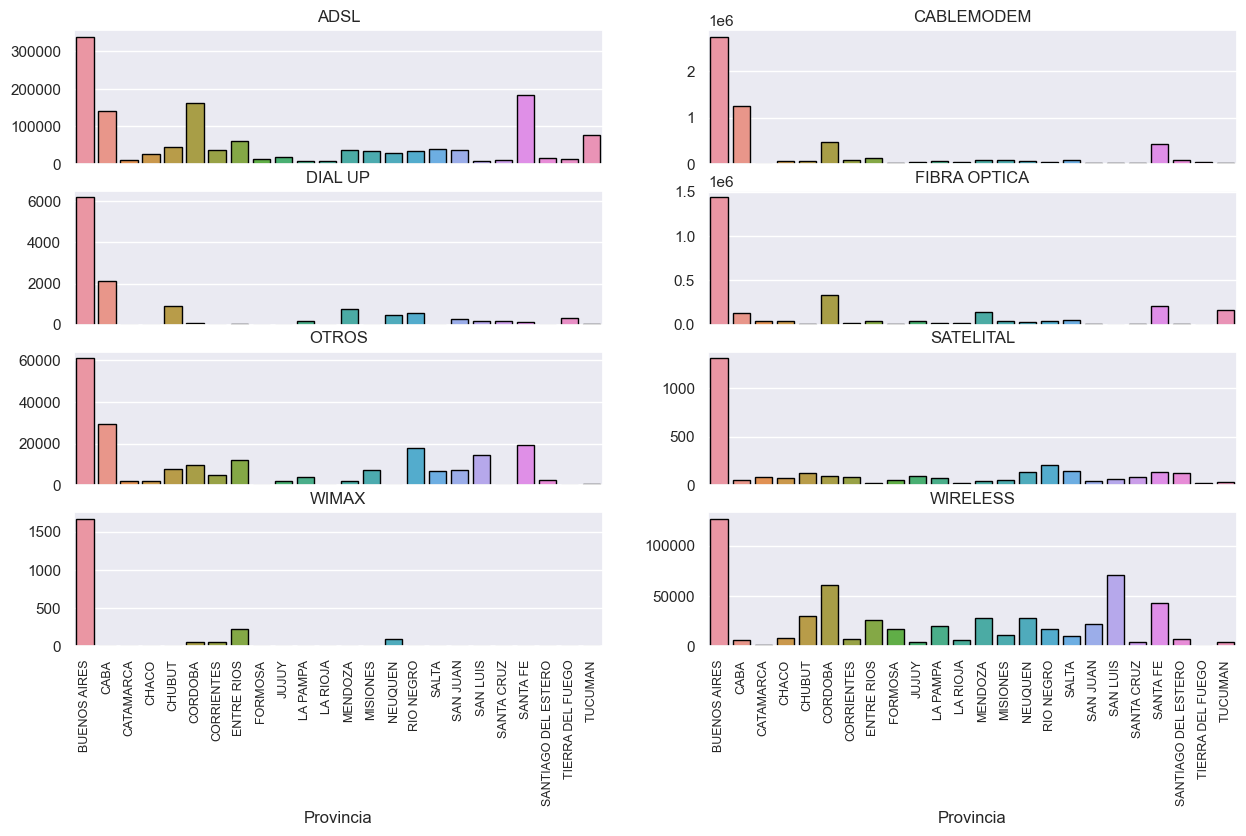

In [45]:
data = internet_fijo_tech_localidades.groupby(by='Provincia').sum().reset_index()

fig, axes = plt.subplots(nrows=4,ncols=2, figsize=(15,8))
for index, ax in enumerate(axes.flatten()):
    sns.barplot(data = data, y=columns[index], x='Provincia', ax=ax, edgecolor='black')
    if ax not in [axes[3, 0], axes[3, 1]]:
        ax.set_xlabel("")
        ax.set_xticks([])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9)
    ax.set_ylabel('')
    ax.set_title(columns[index])
#plt.subplots_adjust(hspace=0.25)

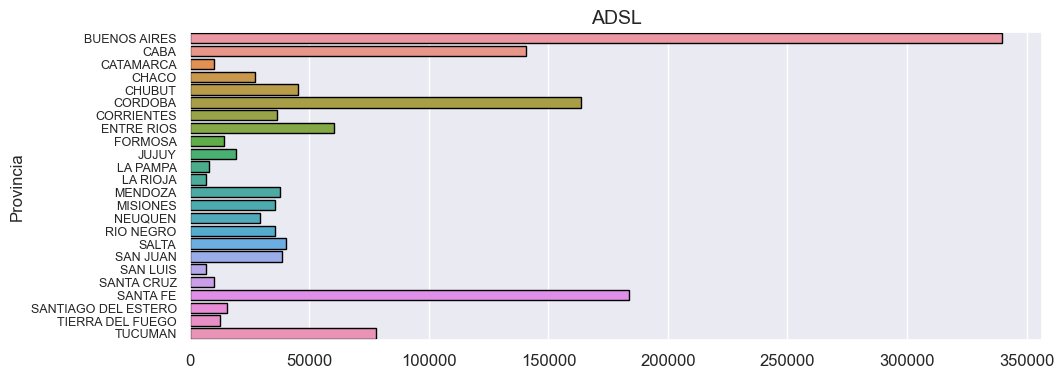

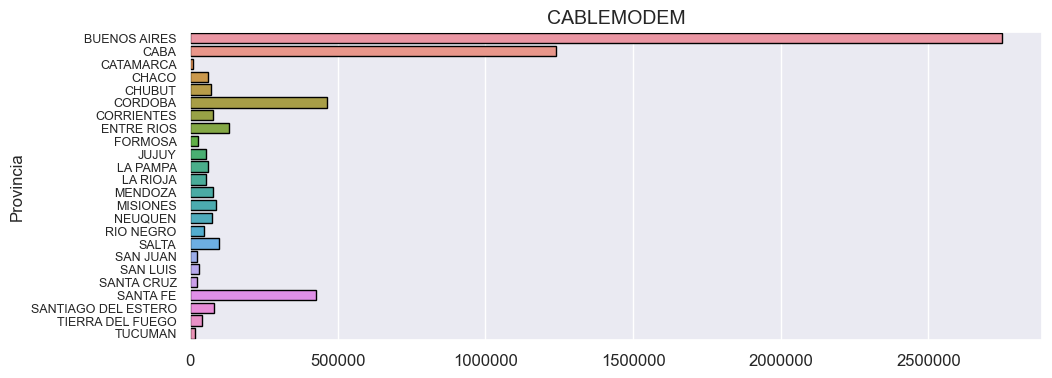

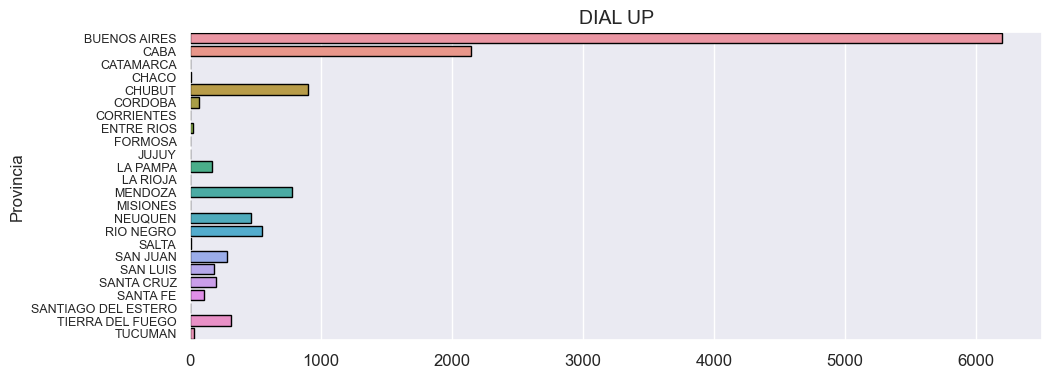

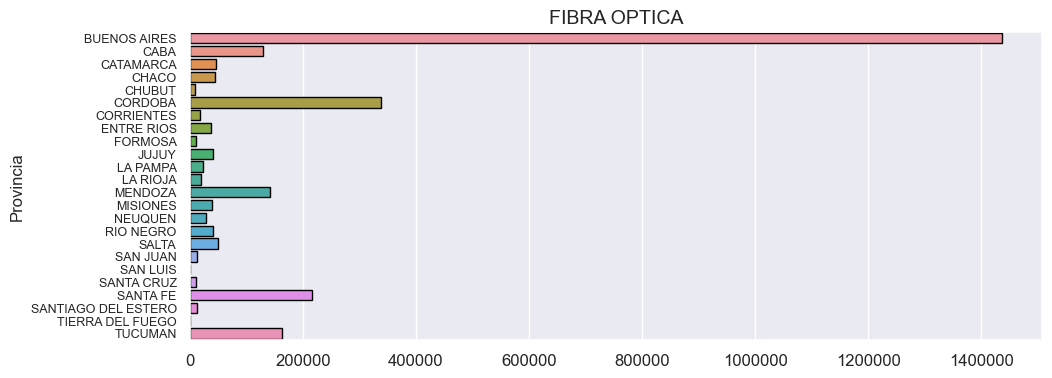

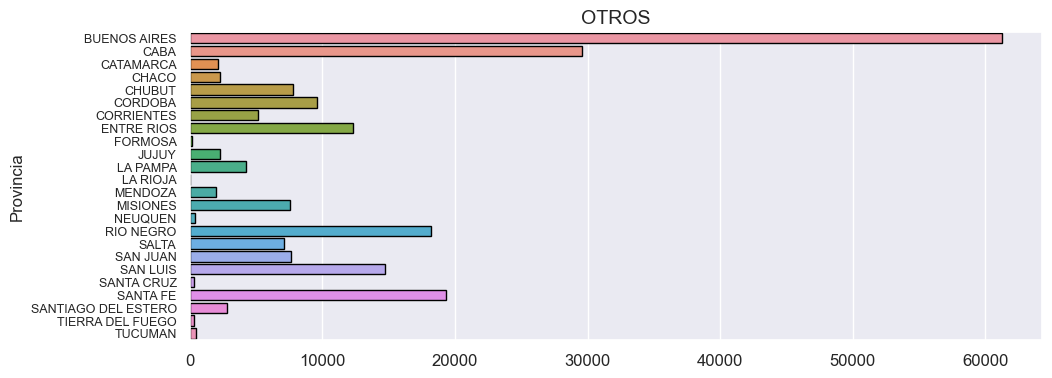

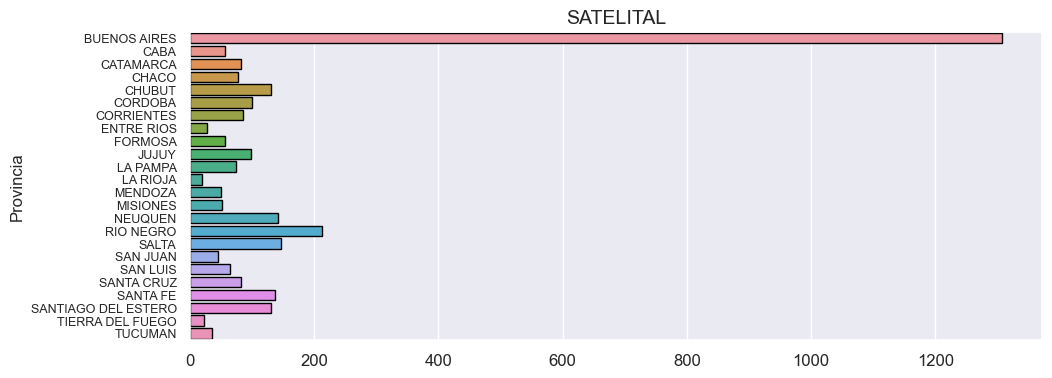

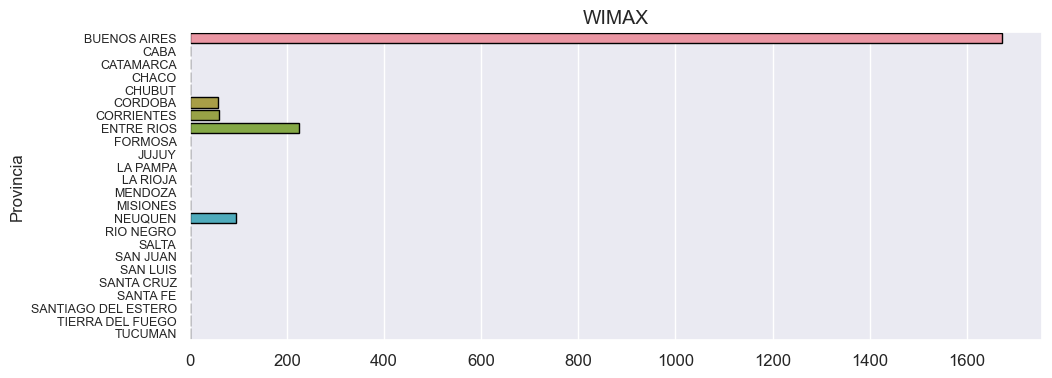

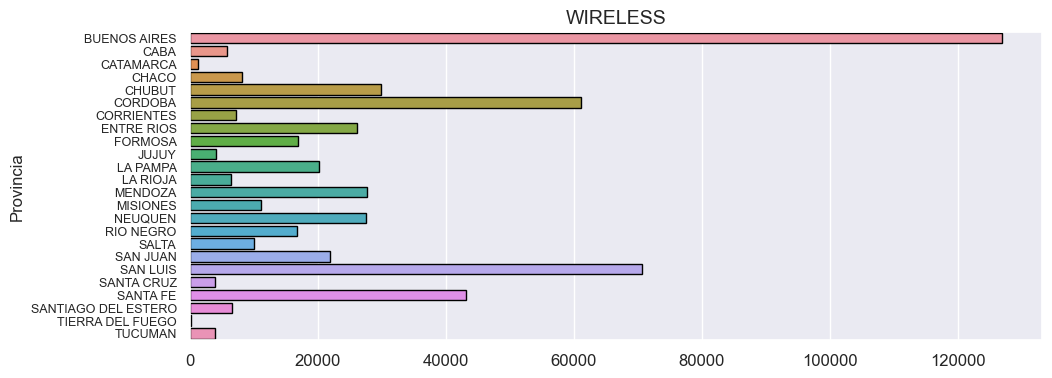

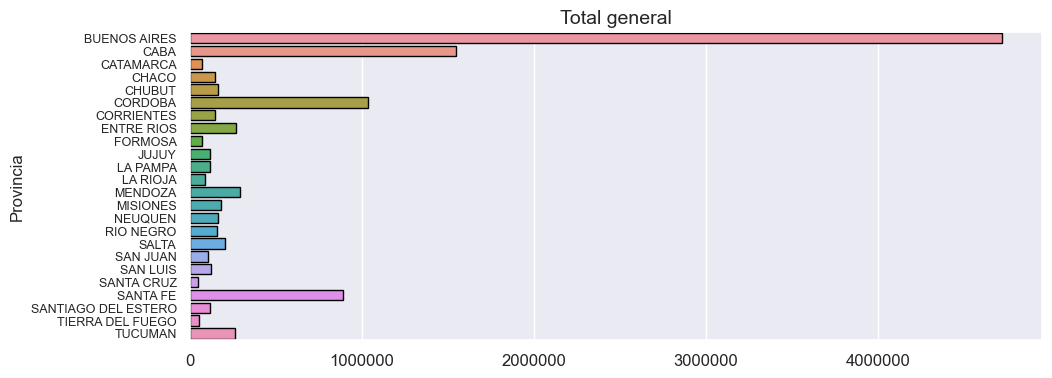

In [209]:
data = internet_fijo_tech_localidades.groupby(by='Provincia').sum().reset_index()
for col in columns:
    plt.figure(figsize=(11,4))
    sns.barplot(data = data, x=col,y='Provincia', edgecolor='black')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=9)
    plt.ticklabel_format(style='plain', axis='x')
    plt.xlabel('')
    plt.title(col, fontsize=14)
    plt.show()

In [70]:
provincias = data.Provincia.unique()
provincias

array(['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
       'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN'], dtype=object)

In [46]:
def tecnologias_por_provincia(provincia):
    plt.figure(figsize=(15,6))
    sns.barplot(data = data[data.Provincia == provincia])
    plt.title(f'Tecnologias actuales de la provinciaincia {provincia}', fontsize=16)
    plt.ylabel('Cantidad de accesos', fontsize=13)
    plt.show()

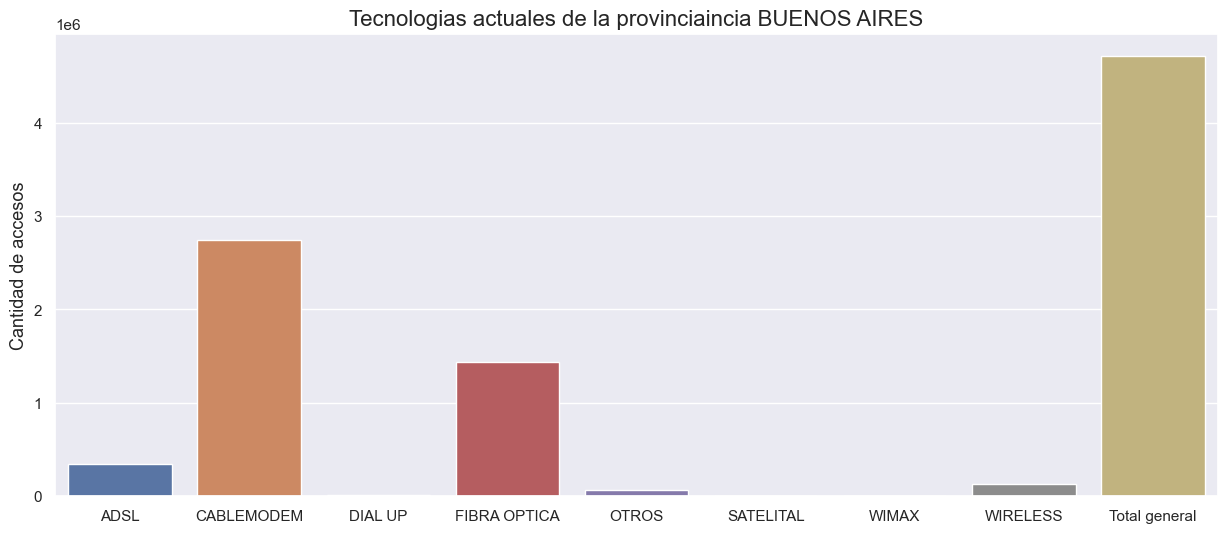

In [47]:
tecnologias_por_provincia('BUENOS AIRES')

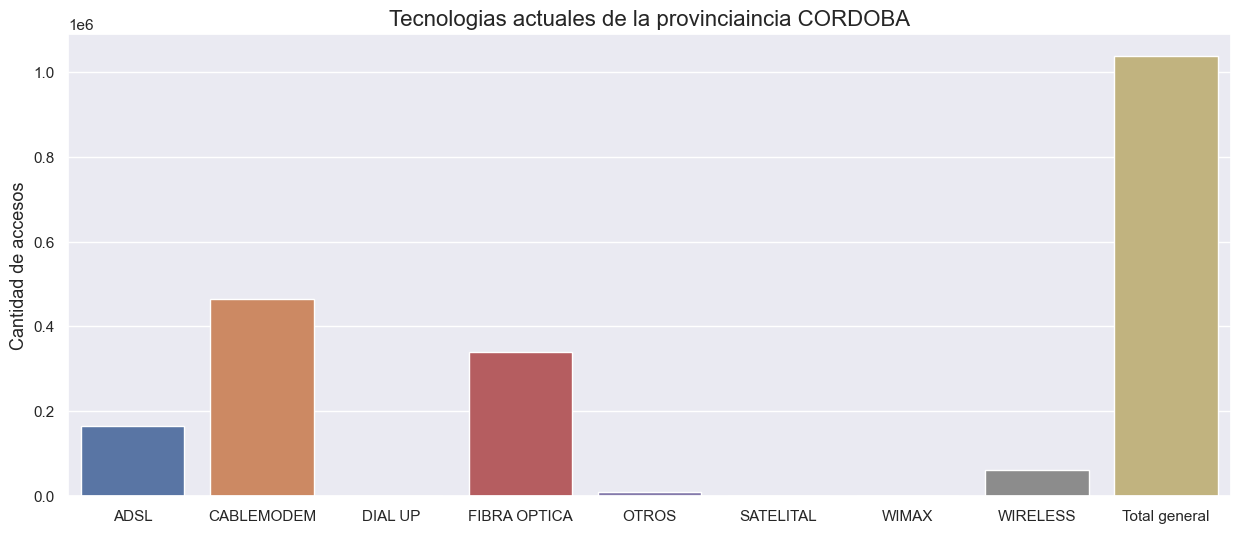

In [214]:
tecnologias_por_provincia('CORDOBA')

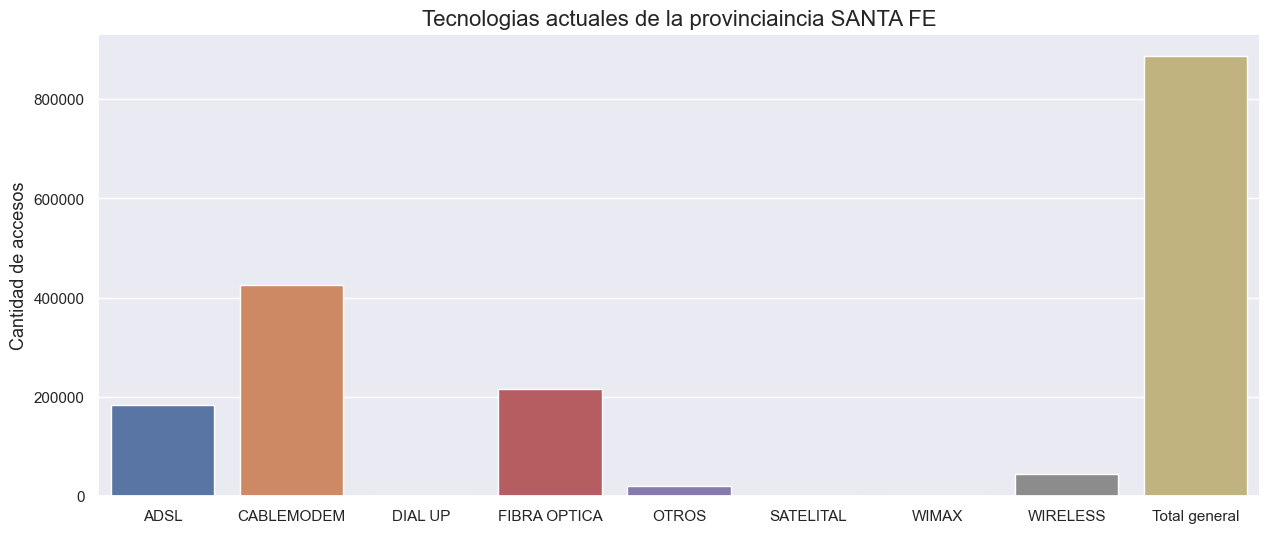

In [215]:
tecnologias_por_provincia('SANTA FE')

In [94]:
df = pd.read_csv('clean_datasets/velocidad_bajada_localidades.csv')
df.sample(3)

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
1425,ENTRE RIOS,Federal,Nueva Vizcaya,30035040,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1225,CORDOBA,San Justo,Plaza Luxardo,14140310,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1234,CORDOBA,San Justo,Tránsito,14140400,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
data = df.groupby(by='Provincia').sum().reset_index()
data.sample(4)

,Provincia,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps","0,75 mbps",1 mbps,"1,25 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
5,CORDOBA,4071,2,0,87,10,0,83,5656,0,...,12,0,0,0,0,0,0,0,0,6577
20,SANTA FE,8090,32,0,335,101,0,5,6266,0,...,0,0,1605,0,0,0,0,0,1,6361
3,CHACO,2072,0,225,234,2,111,0,876,25,...,0,0,0,0,0,0,0,0,0,539
19,SANTA CRUZ,647,3,0,26,23,0,218,322,0,...,104,0,0,0,0,0,0,0,0,150


In [96]:
df_melted = pd.melt(data, id_vars='Provincia')

In [97]:
df_melted[df_melted.Provincia == 'CORDOBA']

,Provincia,variable,value
5,CORDOBA,Otros,4071
29,CORDOBA,"0,256 mbps",2
53,CORDOBA,"0,375 mbps",0
77,CORDOBA,"0,5 mbps",87
101,CORDOBA,"0,512 mbps",10
...,...,...,...
1781,CORDOBA,85 mbps,0
1805,CORDOBA,90 mbps,0
1829,CORDOBA,92 mbps,0
1853,CORDOBA,95 mbps,0


Quiero crear una columna que represente los `mbps` en un valor numerico para poder setearlo en el eje x del grafico

In [ ]:
for index, value in enumerate(df_melted.value):
    if value != 'Otros':
        df_melted.at[index, 'value'] = 

In [123]:
df_melted['Mbps'] = pd.to_numeric(df_melted['variable'].astype(str).str.strip(' mbps').str.replace(',','.'), errors = 'coerce').astype(float)
df_melted['Mbps'] = df_melted['Mbps'].fillna(-1)

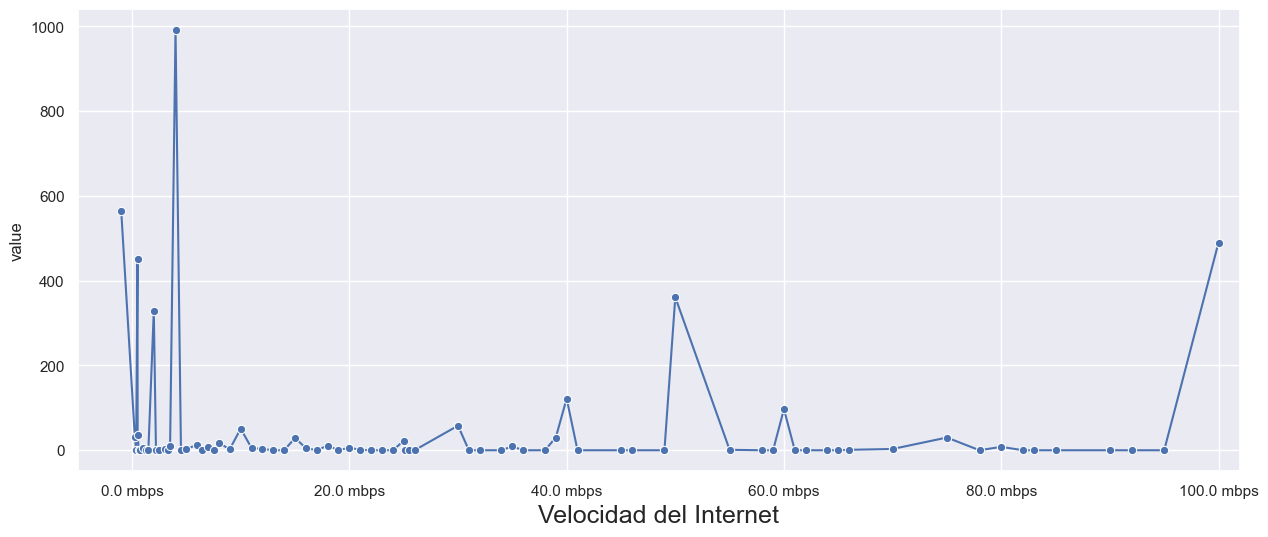

In [142]:
plt.figure(figsize=(15,6))
sns.lineplot(data = df_melted[df_melted.Provincia == 'CABA'], x='Mbps', y='value', marker='o')
plt.xticks(plt.xticks()[0], labels= [f'{tick} mbps' for tick in plt.xticks()[0]])
plt.xlabel('Velocidad del Internet', fontsize=18)
plt.xlim(-5,102)
plt.show()

In [153]:
from pandas_profiling import ProfileReport

In [154]:
profile = ProfileReport(df_melted)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df = pd.read_csv('original_datasets/historico_velocidad_internet_provincias.csv')
df

,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN
2,2022,3,Catamarca,61,NaN,NaN
3,2022,3,Chaco,53,NaN,NaN
4,2022,3,Chubut,16,NaN,NaN
...,...,...,...,...,...,...
835,2014,1,Santa Cruz,3,NaN,NaN
836,2014,1,Santa Fe,3,NaN,NaN
837,2014,1,Santiago Del Estero,3,NaN,NaN
838,2014,1,Tierra Del Fuego,3,NaN,NaN
